#Clustering KNeighborsClassifier - predict the Neighbourhood for one city

In [ ]:
#Initial test: Creating a decision tree. Decision tree just uses max and min temp as x values (for now), to predict a city

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("NorthAmericaCityAirbnb.csv"))

In [3]:
df

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,$38.00,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,$133.00,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,$252.00,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,$40.00,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,$135.00,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
248816,7788,"Washington,DC",Kia,"Shaw, Logan Circle",38.90567,-77.02976,Entire serviced apartment,Entire home/apt,$183.00,91,329,NaN
248817,7789,"Washington,DC",Kia,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.92104,-77.03229,Entire serviced apartment,Entire home/apt,$169.00,91,301,NaN
248818,7790,"Washington,DC",Antonio,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.92801,-76.99795,Entire townhouse,Entire home/apt,$68.00,30,175,NaN
248819,7791,"Washington,DC",Connie,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",38.96935,-77.00764,Private room in bed and breakfast,Private room,$60.00,14,364,NaN


In [4]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])

In [5]:
df.dropna(subset = ["Reviews Scores Rating"], inplace=True)

In [6]:
df.dtypes

Unnamed: 0                 int64
City                      object
Host Name                 object
Neighbourhood             object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Price                    float64
Minimum Nights             int64
Availability 365           int64
Reviews Scores Rating    float64
dtype: object

In [7]:
y = df["City"]

In [8]:
X= df[["Price", "Reviews Scores Rating"]]

In [9]:
X.shape, y.shape

((189550, 2), (189550,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.152823499620157

In [13]:
predictions = model.predict(X_test)

In [14]:
predictions

array(['New York City,NY', 'New York City,NY', 'New York City,NY', ...,
       'Hawaii,HI', 'Montreal,QC', 'Hawaii,HI'], dtype=object)

In [15]:
data_point = [[-2, 8]]

model.predict(data_point)

array(['Austin,TX'], dtype=object)

# Let's reduce dataset to Dec. 20 - Dec. 29 to see if model score increases (Only Max. and Min. temp)

In [ ]:
# 1.We find the variable types of each column - We need to change date to a date-time variable
df.dtypes

In [ ]:
# We create a column with date as a datetime
#df['Time_stamp'] = pd.to_datetime(df['Date'].str.strip(), format='%Y/%m/%d')

In [ ]:
#User would imput this value
#df['day'] = df.Time_stamp.dt.day
#df['month'] = df.Time_stamp.dt.month
#df['year'] = df.Time_stamp.dt.year

In [ ]:
df

In [ ]:
#Answers to be provided by user
Month = 12
Start_Day = 21
End_Day = 31


In [ ]:
df_new = df[(df.month == Month) & (df.day >= Start_Day) & (df.day <= End_Day)]

In [ ]:
df_new

In [ ]:
y = df_new3["City"]

In [ ]:
X= df_new3[["temp_max", "temp_min"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
data_point = [[15, 10]]

model.predict(data_point)

# Let's keep same period of time and add humidity

In [ ]:
y = df_new["City"]

In [ ]:
X= df_new[["Price", "Reviews Scores Rating"]] #"humidity", "windspeed", "precip", "snow"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
#For humidity, maybe the user inputs very high high, medium or low --> very high 80 , high 65, medium 40, low 20
data_point = [[-5, -10, 80]]

model.predict(data_point)

# Neighbors

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,38.0,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,133.0,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,252.0,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,40.0,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,135.0,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
248724,7696,"Washington,DC",Nick,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90364,-77.02152,Entire apartment,Entire home/apt,68.0,1,20,100.0
248732,7704,"Washington,DC",Deondra,"Fairfax Village, Naylor Gardens, Hillcrest, Su...",38.86122,-76.94883,Private room in condominium,Private room,66.0,1,262,100.0
248738,7710,"Washington,DC",Crystal,"Brightwood Park, Crestwood, Petworth",38.95626,-77.02344,Entire condominium,Entire home/apt,89.0,2,353,100.0
248758,7730,"Washington,DC",Joseph,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91794,-77.01280,Entire house,Entire home/apt,399.0,2,150,100.0


In [9]:
df_filtered = df[(df.City == "Montreal,QC")]
df_filtered

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,38.0,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,133.0,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,252.0,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,40.0,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,135.0,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14012,14012,"Montreal,QC",Alexandre Et Steven,Ville-Marie,45.51946,-73.56272,Entire apartment,Entire home/apt,74.0,1,71,60.0
14014,14014,"Montreal,QC",Natalia,Le Sud-Ouest,45.45329,-73.59584,Entire apartment,Entire home/apt,67.0,1,365,80.0
14015,14015,"Montreal,QC",Julien,Ville-Marie,45.50370,-73.56231,Entire loft,Entire home/apt,68.0,1,318,100.0
14040,14040,"Montreal,QC",Ozan,Saint-Laurent,45.51102,-73.67354,Entire loft,Entire home/apt,96.0,1,349,20.0


In [10]:
X= df_filtered[["Price"]]

In [11]:
y = df_filtered["Neighbourhood"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_scaler = StandardScaler().fit(X_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
model1.score(X_test_scaled, y_test)

0.19845559845559846

In [18]:
train_score = []
test_score = []
for k in range(1, 20, 2): 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  train_score.append(model.score(X_train_scaled, y_train))
  test_score.append(model.score(X_test_scaled, y_test))
  print(k, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))


1 0.22621346723316596 0.17953667953667954
3 0.21835972705034118 0.19845559845559846
5 0.2415346980816274 0.20656370656370657
7 0.2768121539848075 0.24324324324324326
9 0.28003089996137503 0.2494208494208494
11 0.2989571263035921 0.2648648648648649
13 0.3078408651989185 0.26833976833976836
15 0.30513711857860176 0.266023166023166
17 0.3093858632676709 0.2702702702702703
19 0.3048796189004764 0.2590733590733591


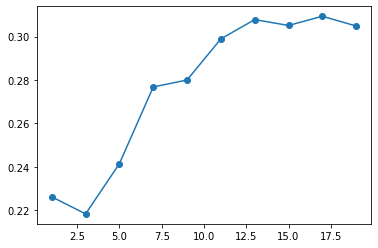

In [19]:
plt.plot(range(1, 20, 2), train_score, marker='o')

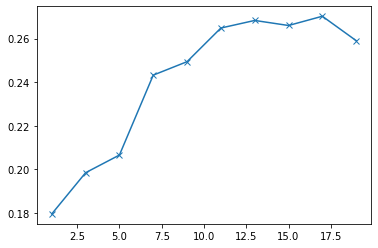

In [20]:
plt.plot(range(1, 20, 2), test_score, marker="x")

In [21]:
#data_point = [[3.1, 0, 90...]]

#model1.predict(data_point)

In [22]:
df_filtered = df[(df.City == "Montreal,QC")]
df_filtered

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,38.0,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,133.0,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,252.0,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,40.0,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,135.0,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14012,14012,"Montreal,QC",Alexandre Et Steven,Ville-Marie,45.51946,-73.56272,Entire apartment,Entire home/apt,74.0,1,71,60.0
14014,14014,"Montreal,QC",Natalia,Le Sud-Ouest,45.45329,-73.59584,Entire apartment,Entire home/apt,67.0,1,365,80.0
14015,14015,"Montreal,QC",Julien,Ville-Marie,45.50370,-73.56231,Entire loft,Entire home/apt,68.0,1,318,100.0
14040,14040,"Montreal,QC",Ozan,Saint-Laurent,45.51102,-73.67354,Entire loft,Entire home/apt,96.0,1,349,20.0


In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [24]:
X= df_filtered[["Price"]]

In [25]:
y = df_filtered["Neighbourhood"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X_scaler = StandardScaler().fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
model1.score(X_test_scaled, y_test)

0.19845559845559846

In [32]:
train_score = []
test_score = []
for k in range(1, 20, 2): 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  train_score.append(model.score(X_train_scaled, y_train))
  test_score.append(model.score(X_test_scaled, y_test))
  print(k, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

1 0.22621346723316596 0.17953667953667954
3 0.21835972705034118 0.19845559845559846
5 0.2415346980816274 0.20656370656370657
7 0.2768121539848075 0.24324324324324326
9 0.28003089996137503 0.2494208494208494
11 0.2989571263035921 0.2648648648648649
13 0.3078408651989185 0.26833976833976836
15 0.30513711857860176 0.266023166023166
17 0.3093858632676709 0.2702702702702703
19 0.3048796189004764 0.2590733590733591


# Le'ts reduce dataset

In [ ]:
#Top 5 and bottom 5 based on temperature:
df_average_temperature = df[df.City.isin(["Quebec City, QC", "New Brunswick, NB", "Twin Cities, MN", "Ottawa, ON", "Montreal, QC", "Hawaii, HI", "Broward County, FL", "New Orleans, LA", "Austin, TX", "Clark County, NV"])]

In [ ]:
#Answers to be provided by user
Month = 12
Start_Day = 21
End_Day = 31

In [ ]:
#Top 5 and bottom 5 based on latitude:

df_lat = df[df.City.isin(["Hawaii, HI", "Broward County, FL", "New Orleans, LA", "Austin, TX", "San Diego, CA", "Vancouver, BC", "Seattle, WA", "Quebec City, QC", "New Brunswick, NB", "Portland, OR"])]

In [ ]:
df_lat

In [ ]:
#Answers to be provided by user
Month = 12
Start_Day = 21
End_Day = 31

In [ ]:
df_new_lat = df_lat[(df.month == Month) & (df.day >= Start_Day) & (df.day <= End_Day)]

In [ ]:
X= df_new_lat[["temp_max", "temp_min", "humidity"]] #, "snow"

In [ ]:
y = df_new_lat["City"]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train_scaled, y_train)

In [ ]:
model1.score(X_test_scaled, y_test)

In [ ]:
train_score = []
test_score = []
for k in range(1, 20, 2): 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  train_score.append(model.score(X_train_scaled, y_train))
  test_score.append(model.score(X_test_scaled, y_test))
  print(k, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))


In [ ]:
#top 3 bottom 3 and 3 in

df_lat = df[df.City.isin(["Hawaii, HI", "Broward County, FL", "New Orleans, LA", "San Francisco, CA", "Nashville, TN", "Vancouver, BC", "Seattle, WA", "Quebec City, QC", "Columbus, OH", "Toronto, ON"])]

In [ ]:
data_point = [[3.1, 0, 90]]

model1.predict(data_point)